In [1]:
import pandas as pd
import numpy as np

import matplotlib
# %matplotlib inline
from pylab import *

In [2]:
file_dir = '/Users/tianyiyang/Downloads/TeamConflict/'
conflict_data_total = pd.read_csv(file_dir+'conflict_data_acled_2018_2021.csv')

In [3]:
conflict_data_total

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
0,7767296,32,ARG7124,7124,26 March 2021,2021,1,Protests,Peaceful protest,Protesters (Argentina),...,San Carlos de Bariloche,-41.1335,-71.3103,1,El Cordillerano,Subnational,"On 26 March 2021, in San Carlos de Bariloche (...",0,1617033264,ARG
1,7767808,887,YEM63695,63695,26 March 2021,2021,1,Battles,Armed clash,Military Forces of Yemen (2012-),...,Al Kasarah,15.5381,45.1357,2,Al Masdar; Nukhba Hadramawt,National,"On 26 March 2021, pro-Hadi and Houthi forces c...",1,1617039259,YEM
2,7768064,222,SLV2499,2499,26 March 2021,2021,1,Battles,Armed clash,MS-13: Mara Salvatrucha,...,San Rafael Cedros,13.7333,-88.8833,2,El Salvador.com,National,"On 26 March 2021, in San Rafael Cedros municip...",1,1617047503,SLV
3,7787008,642,ROU1529,1529,26 March 2021,2021,1,Protests,Peaceful protest,Protesters (Romania),...,Targu Mures,46.5500,24.5667,1,Adevarul,National,"On 26 March 2021, cultural workers and artists...",0,1617121993,ROM
4,7788032,756,CHE198,198,26 March 2021,2021,1,Protests,Peaceful protest,Protesters (Switzerland),...,Lausanne,46.5197,6.6323,1,24 Heures,National,"On 26 March 2021, about 1,500 people, among th...",0,1617132585,CHE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680207,5618430,804,UKR2798,2798,27 March 2018,2018,1,Explosions/Remote violence,Shelling/artillery/missile attack,Military Forces of Ukraine (2014-2019),...,Sosnovskoye,47.2972,37.9076,2,Donetsk News Agency,Subnational,"On 27 March 2018, Military Forces of Ukraine f...",0,1563902418,UKR
680208,7748863,76,BRA31583,31583,27 March 2018,2018,1,Protests,Peaceful protest,Protesters (Brazil),...,Sao Paulo - West Zone,-23.5735,-46.7048,1,G1,National,"On 27 March 2018, in the west zone of Sao Paul...",0,1615851810,BRA
680209,7364351,76,BRA22140,22140,27 March 2018,2018,1,Protests,Peaceful protest,Protesters (Brazil),...,Angra dos Reis,-23.0067,-44.3181,1,G1,National,"On 27 March 2018, in Angra dos Reis (Rio de Ja...",0,1607554981,BRA
680210,6840575,4,AFG36543,36543,27 March 2018,2018,1,Battles,Armed clash,Taliban,...,Jurm,36.8648,70.8342,2,Voice of Jihad,Other,"On March 27th, a soldier was killed and anothe...",0,1580846985,AFG


In [4]:
from datetime import datetime

def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%d %B %Y")
    d2 = datetime.strptime(d2, "%d %B %Y")
    return ((d2 - d1).days)

In [5]:
event_date_all = np.asarray(conflict_data_total['event_date'])
fatalities_all = conflict_data_total['fatalities']
event_type_all = conflict_data_total['event_type']
unique_event_type_total = np.unique(event_type_all)

In [6]:
covid_19_start_datestr = '17 November 2019'
print(event_date_all.shape)

(680212,)


In [7]:
%%time

date_differece = np.zeros((len(event_date_all)))

for eventi in range(0, len(event_date_all)):
    date_differece[eventi] = days_between(event_date_all[eventi], covid_19_start_datestr)

CPU times: user 9.11 s, sys: 64.9 ms, total: 9.18 s
Wall time: 9.3 s


In [8]:
print("# of event happened before pandemic: ", len(event_date_all[date_differece<=0]))
print("# of event happened after pandemic: ", len(event_date_all[date_differece>0]))

# of event happened before pandemic:  341429
# of event happened after pandemic:  338783


In [9]:
event_type_bef = np.asarray(event_type_all[date_differece<=0])
event_type_aft = np.asarray(event_type_all[date_differece>0])

fatalities_bef = fatalities_all[date_differece<=0]
fatalities_aft = fatalities_all[date_differece>0]

In [10]:
# plt.hist(fatalities_bef[fatalities_bef<10],bins=50,label='facilities_bef',alpha=0.8,histtype='step')
# plt.hist(fatalities_aft[fatalities_aft<10],bins=50,label='fatalities_aft',alpha=0.8,histtype='step')

# plt.legend()
# plt.ylabel('N',fontsize=18)

In [11]:
diff_type_bef = []
diff_type_aft = []

for typei in range(0, len(unique_event_type_total)):
    
    
    arg_match_bef = np.argwhere(event_type_bef==unique_event_type_total[typei]).flatten()
    arg_match_aft = np.argwhere(event_type_aft==unique_event_type_total[typei]).flatten()
    
    diff_type_bef += list([len(arg_match_bef)])
    diff_type_aft += list([len(arg_match_aft)])
    

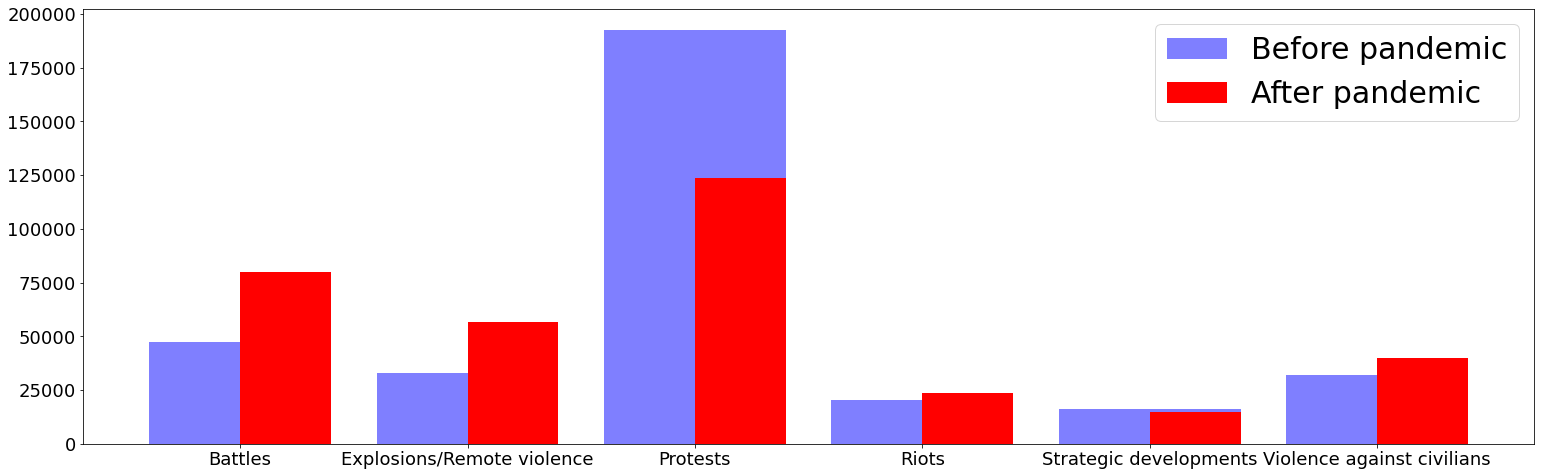

In [14]:
plt.figure(figsize=(26,8))
plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18)


width = 0.8

event_happened_bef = diff_type_bef
event_happened_aft = diff_type_aft
indices = np.arange(len(event_happened_bef))
LABELS = unique_event_type_total

plt.bar(indices, event_happened_bef, width=width, 
        color='b', alpha=0.5, label='Before pandemic')
plt.bar([i+0.25*width for i in indices], event_happened_aft, 
        width=0.5*width, color='r', label='After pandemic')
plt.xticks(indices, LABELS)

plt.legend(fontsize = 30)
plt.show()